In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("PHASEdata.csv")

In [ ]:
data.head()

In [4]:
data.rename(columns={'Phase ': 'Unnamed: 1'}, inplace=True)

In [5]:
data.columns

Index(['Z (nm)', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 2295', 'Unnamed: 2296', 'Unnamed: 2297', 'Unnamed: 2298',
       'Unnamed: 2299', 'Unnamed: 2300', 'Unnamed: 2301', 'Unnamed: 2302',
       'Unnamed: 2303', 'Unnamed: 2304'],
      dtype='object', length=2305)

In [183]:
#Replace unnamed columns with numerical values.
i = iter(range(1, len(data.columns) + 1))
data.columns = [x if not x.startswith('Unnamed') else next(i) for x in data.columns]

In [184]:
data = pd.DataFrame(data)

In [6]:
data.head()

,Z (nm),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 2295,Unnamed: 2296,Unnamed: 2297,Unnamed: 2298,Unnamed: 2299,Unnamed: 2300,Unnamed: 2301,Unnamed: 2302,Unnamed: 2303,Unnamed: 2304
0,2.000000,91.948970,91.706791,90.946050,91.316316,91.234438,90.569484,91.274254,91.903525,90.900799,...,90.522709,90.680466,91.222726,91.098012,90.984417,91.541935,91.956749,91.799184,90.407954,91.608806
1,1.999980,91.823050,90.997308,90.177687,91.675193,90.210515,91.814168,90.925633,90.524117,90.770430,...,90.111633,90.758103,91.631524,91.358850,90.075962,90.881316,91.702550,90.044096,90.646009,91.750187
2,1.999921,91.487359,91.562371,91.494568,90.941529,90.580548,91.530404,91.258212,91.188640,90.096011,...,91.297081,91.204475,90.777296,91.729438,90.434161,90.652615,90.270954,90.448096,90.215209,90.329863
3,1.999822,91.521175,90.656362,90.308627,91.777453,90.433671,91.111552,90.105340,90.690464,91.960605,...,90.034236,91.879132,91.649429,91.158372,91.333904,91.584472,91.654439,91.273196,90.205081,90.840706
4,1.999684,91.259976,91.345418,91.886045,91.568526,90.025298,91.120202,91.775452,91.953569,90.386481,...,90.648606,90.450429,90.310075,91.725319,91.640608,91.565779,91.672420,90.329641,91.570910,90.447380


In [111]:
Data_Z = pd.DataFrame(data[('Z (nm)')])

In [209]:
Data_First_Row = pd.DataFrame(data.iloc[0])

In [187]:
Data_First_Row_Parse = pd.DataFrame(Data_First_Row.iloc[1:49])

In [246]:
def parsedata(df,k):
    Data_Transformed = pd.DataFrame(df.copy())
    Data_Transformed = Data_Transformed.T
    if len(Data_Transformed.columns) > (k + 1):
        row_parse = pd.DataFrame(Data_Transformed.iloc[:, 1:49])
        new_df = pd.concat([Data_First_Row_T, row_parse])
        new_df.drop_duplicates(keep = False)
    else:
        new_df2['Z (nm)'] = new_df2['Z (nm)'].iloc[0]
        pass
    return new_df

In [ ]:
def test(df):
    for i in range(len(df)):
        if len(df) > 2:
            df = df[:-1]
            continue
        else:
            return df

In [355]:
def parsetry(df):
    Data_Transformed = pd.DataFrame(df.copy())
    Data_Transformed = Data_Transformed.T
    for i in range(len(Data_Transformed.columns)):
        if len(Data_Transformed.columns) > (49):
            Data_Transformed = Data_Transformed.iloc[:, :-1]
            continue
        else:
            pass
    return Data_Transformed

In [360]:
def parsetry2(df):    
    Data_Transformed = pd.DataFrame(df.copy())
    Data_Transformed = Data_Transformed.T
    for i in range(len(Data_Transformed.columns)):
        if len(Data_Transformed.columns) > (48):
            row_parse = pd.DataFrame(Data_Transformed.iloc[:, 1:49])
            new_df = pd.concat([Data_First_Row_T, row_parse])
            new_df.drop_duplicates(keep = False)
        else:
            pass
    return new_df

In [361]:
foo = pd.DataFrame(np.linspace(0,100,100))
parsetry2(foo)

/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/pandas/core/indexes/api.py:87: RuntimeWarning:

'<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects



,Z (nm),1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,2304
0,2.0,91.948970,91.706791,90.946050,91.316316,91.234438,90.569484,91.274254,91.903525,90.900799,...,90.522709,90.680466,91.222726,91.098012,90.984417,91.541935,91.956749,91.799184,90.407954,91.608806
0,NaN,1.010101,2.020202,3.030303,4.040404,5.050505,6.060606,7.070707,8.080808,9.090909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
def test(df):
    for i in range(len(df)):
        if len(df) > 2:
            df = df[:-1]
            continue
        else:
            return df

In [194]:
row_parse2 = pd.DataFrame(Data_First_Row_T.iloc[:, 1:49])
new_df2 = pd.concat([new_df, row_parse2], ignore_index = True)

In [195]:
new_df2

,Z (nm),1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,2304
0,2.0,91.94897,91.706791,90.94605,91.316316,91.234438,90.569484,91.274254,91.903525,90.900799,...,90.522709,90.680466,91.222726,91.098012,90.984417,91.541935,91.956749,91.799184,90.407954,91.608806
1,NaN,91.94897,91.706791,90.94605,91.316316,91.234438,90.569484,91.274254,91.903525,90.900799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,91.94897,91.706791,90.94605,91.316316,91.234438,90.569484,91.274254,91.903525,90.900799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
new_df2['Z (nm)'] = new_df2['Z (nm)'].iloc[0]

In [201]:
new_df2.head()

,Z (nm),1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,2304
0,2.0,91.94897,91.706791,90.94605,91.316316,91.234438,90.569484,91.274254,91.903525,90.900799,...,90.522709,90.680466,91.222726,91.098012,90.984417,91.541935,91.956749,91.799184,90.407954,91.608806
1,2.0,91.94897,91.706791,90.94605,91.316316,91.234438,90.569484,91.274254,91.903525,90.900799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,91.94897,91.706791,90.94605,91.316316,91.234438,90.569484,91.274254,91.903525,90.900799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
%matplotlib inline

In [10]:
##%matplotlib notebook if I want graphs to be interactive.

In [166]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [11]:
approach = data[:502]

In [12]:
approach = approach.drop(['Z (nm)'], axis=1)

In [13]:
approach.head()

,1,2,3,4,5,6,7,8,9,10,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,2304
0,91.948970,91.706791,90.946050,91.316316,91.234438,90.569484,91.274254,91.903525,90.900799,90.801991,...,90.522709,90.680466,91.222726,91.098012,90.984417,91.541935,91.956749,91.799184,90.407954,91.608806
1,91.823050,90.997308,90.177687,91.675193,90.210515,91.814168,90.925633,90.524117,90.770430,91.600628,...,90.111633,90.758103,91.631524,91.358850,90.075962,90.881316,91.702550,90.044096,90.646009,91.750187
2,91.487359,91.562371,91.494568,90.941529,90.580548,91.530404,91.258212,91.188640,90.096011,90.459150,...,91.297081,91.204475,90.777296,91.729438,90.434161,90.652615,90.270954,90.448096,90.215209,90.329863
3,91.521175,90.656362,90.308627,91.777453,90.433671,91.111552,90.105340,90.690464,91.960605,90.588933,...,90.034236,91.879132,91.649429,91.158372,91.333904,91.584472,91.654439,91.273196,90.205081,90.840706
4,91.259976,91.345418,91.886045,91.568526,90.025298,91.120202,91.775452,91.953569,90.386481,90.224210,...,90.648606,90.450429,90.310075,91.725319,91.640608,91.565779,91.672420,90.329641,91.570910,90.447380


In [14]:
retract = data[-499:]

In [15]:
retract = retract.drop(['Z (nm)'], axis=1)

In [16]:
approach_as_numpy = approach.as_matrix(columns=None)

In [17]:
retract_as_numpy = retract.as_matrix(columns=None)

In [18]:
z_values = data['Z (nm)']

In [19]:
z_values_approach = z_values[:502]

In [20]:
z_values_retract = z_values[-499:]

In [21]:
z_values_approach_as_numpy = z_values_approach.as_matrix(columns=None)

In [22]:
z_values_retract_as_numpy = z_values_retract.as_matrix(columns=None)

In [23]:
approach_as_numpy_reshape = np.array(approach_as_numpy.tolist())

In [31]:
X.shape

(502, 48, 48)

In [32]:
c.shape

(502, 48, 48)

In [33]:
approach_as_numpy.shape

(502, 2304)

In [43]:
approach_as_numpy_reshape.shape

(502, 2304)

In [34]:
# domains
x = np.linspace(0,48,48) 
y = np.linspace(0,48,48)             # [6, 9]
z = z_values_approach_as_numpy            # [-1, 1]

# convert to 2d matrices
Z = np.outer(z.T, z)

In [54]:
# domains
x = np.logspace(-1.,np.log10(5),50) # [0.1, 5]
y = np.linspace(6,9,50)             # [6, 9]
z = np.linspace(-1,1,50)            # [-1, 1]

# convert to 2d matrices
Z = np.outer(z.T, z)        # 50x50
X, Y = np.meshgrid(x, y)    # 50x50

x = np.linspace(0,48,48)
y = np.linspace(0,48,48)
z = z_values_approach_as_numpy
c = approach_as_numpy_reshape1

X, Z, Y = np.meshgrid(x, z, y)

# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
color_dimension = approach_as_numpy_reshape1 # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])
fcolors = m.to_rgba_array(color_dimension)

# plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.canvas.show()

AttributeError: 'ScalarMappable' object has no attribute 'to_rgba_array'

In [27]:
approach_as_numpy_reshape1 = approach_as_numpy.reshape(502,48,48)

In [28]:
approach_as_numpy_reshape1.shape

(502, 48, 48)

AttributeError: 'FigureCanvasAgg' object has no attribute 'show'

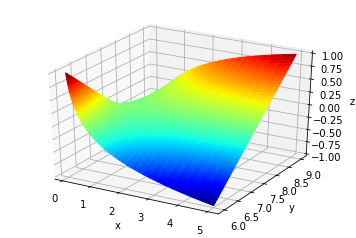

In [52]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# domains
x = np.logspace(-1.,np.log10(5),50) # [0.1, 5]
y = np.linspace(6,9,50)             # [6, 9]
z = np.linspace(-1,1,50)            # [-1, 1]
c = np.linspace(-1,1,50)

# convert to 2d matrices
Z = np.outer(z.T, z)        # 50x50
X, Y = np.meshgrid(x, y)    # 50x50

# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
color_dimension = Z # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

# plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.canvas.show()

In [78]:
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=np.min(cs), vmax=np.max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap,label='Test')
    plt.show()

In [77]:
a = approach_as_numpy_reshape1
b = np.linspace(0,48,48)
c = z_values_approach_as_numpy
d = approach_as_numpy_reshape1
scatter3d(a,b,c,d)

95.25831054

In [1]:
import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

In [2]:
def import_data_retract(file):
    """
    Function to import data file and clean for use in graphing code
    
    import file as CSV!
    
    returns shaped np array (500,48,48)
    
    """
    data = pd.read_csv(file)
    data.rename(columns={'Phase ': 'Unnamed: 1'}, inplace=True) ##this is specific
            ##to the example data might not need in the future.
    i = iter(range(1, len(data.columns) + 1)) ##replace unnamed columns with 
    data.columns = [x if not x.startswith('Unnamed') else next(i) for x in data.columns]
    data = pd.DataFrame(data)
    retract = data[-500:]
    retract = retract.drop(['Z (nm)'], axis=1)
    retract_as_numpy = retract.as_matrix(columns=None)
    retract_as_numpy_reshape = np.array(retract_as_numpy.tolist())
    retract_as_numpy_reshape1 = retract_as_numpy.reshape(500,48,48)
    return retract_as_numpy_reshape1

<IPython.core.display.Javascript object>


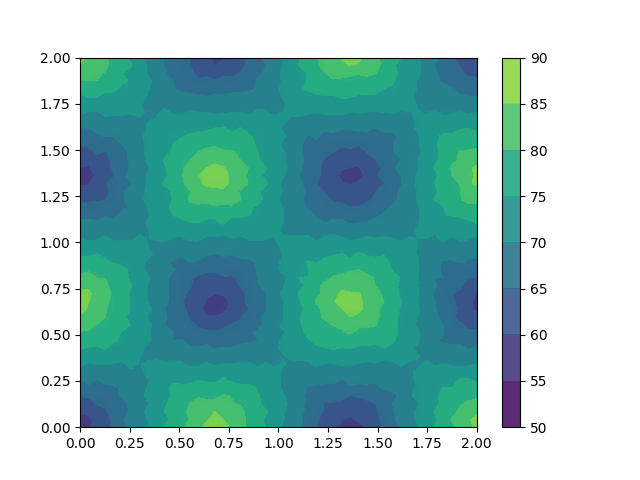

In [4]:
retract_as_numpy_reshape1 = import_data_retract("PHASEdata.csv")

x = np.linspace(0, 2, 48)
y = np.linspace(0, 2, 48)
X, Y = np.meshgrid(x, y)
s = np.shape(X)
nFrames = 500
for i in range(1,501): 
    retract_as_numpy_reshape1[i-1,:,:]

# Set up plotting
fig = plt.figure()
ax = plt.axes()  

# Animation function
def animate(i): 
    z = retract_as_numpy_reshape1[i,:,:]
    cont = plt.contourf(X, Y, z, alpha=0.9, cmap = 'viridis',
                       vmax = np.max(retract_as_numpy_reshape1),
                       vmin = np.min(retract_as_numpy_reshape1))

    return cont  

anim = animation.FuncAnimation(fig, animate, frames=nFrames)
core = plt.contourf(X, Y, retract_as_numpy_reshape1[1,:,:], alpha=0.9, cmap = 'viridis',
                       vmax = np.max(retract_as_numpy_reshape1),
                       vmin = np.min(retract_as_numpy_reshape1))
cbar = plt.colorbar(core)
plt.show()

In [6]:
retract_as_numpy_reshape1 = import_data_retract("PHASEdata.csv")

In [ ]:
retract_as_numpy_reshape2 = retract_as_numpy_reshape1.flatten('F')

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


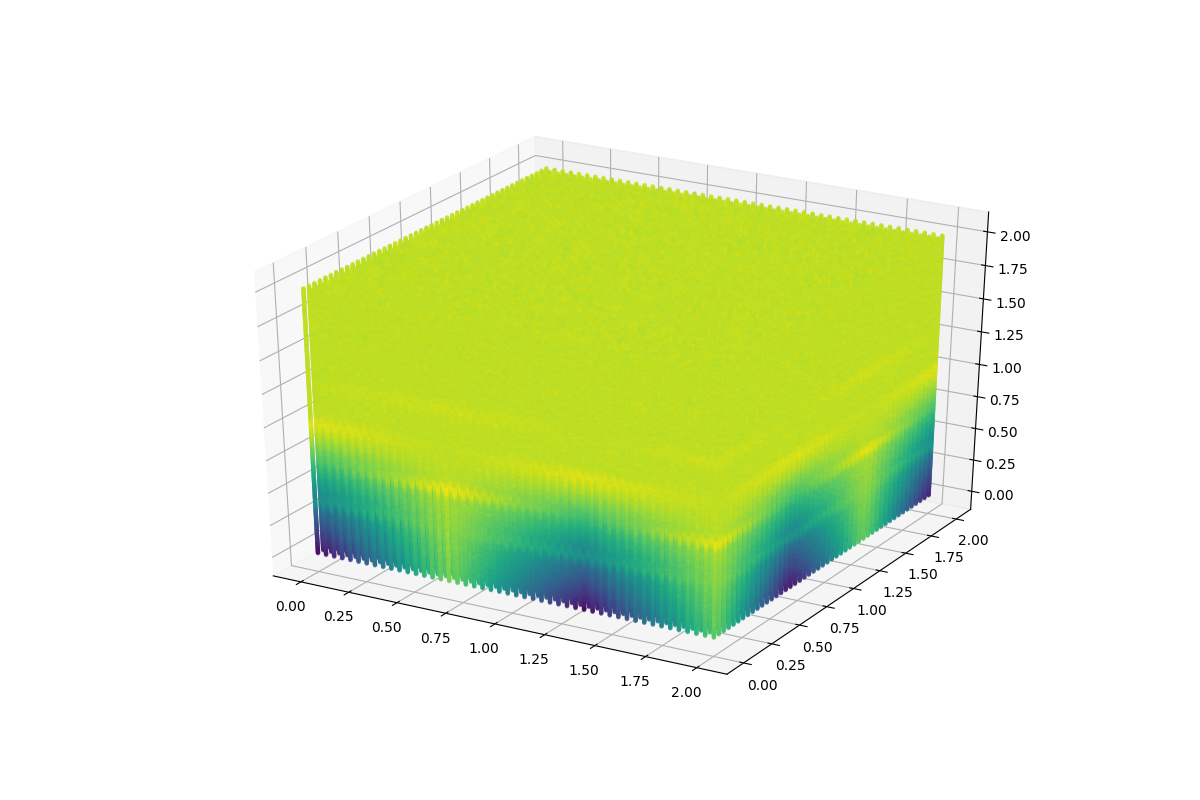

In [47]:
#This works, do not edit.
%pylab
from mpl_toolkits.mplot3d import Axes3D
import itertools

x = np.linspace(0,2,48)
y = np.linspace(0,2,48)
z = np.linspace(0,2,500)

points = []
for element in itertools.product(x, y, z):
    points.append(element)

fxyz = list(retract_as_numpy_reshape2)
xi, yi, zi = zip(*points)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xi, yi, zi, c=fxyz, alpha=0.5, marker=".")
plt.show()

In [16]:
%pylab
from mpl_toolkits.mplot3d import Axes3D
import itertools

x = np.linspace(0,2,48)
y = np.linspace(0,2,48)
z = np.linspace(0,2,500)

points = []
for element in itertools.product(x, y, z):
    points.append(element)

fxyz = list(retract_as_numpy_reshape2)
xi, yi, zi = zip(*points)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xi, yi, zi, c=fxyz, alpha=0.5, marker=".")
plt.show()

In [43]:
retract_as_numpy_reshape2 = retract_as_numpy_reshape1.flatten('F')

In [37]:
len(points)

1152000

In [44]:
len(retract_as_numpy_reshape2)

1152000

In [1]:
import scipy.io  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mat_phase = scipy.io.loadmat('FFM0012_04272018_PHASEtot.mat')
mat_zsensor = scipy.io.loadmat('FFM0012_04272018_ZSNSRtot.mat')

In [251]:
phase = mat_phase['PHASEtot']
zsensor = mat_zsensor['ZSNSRtot']

In [4]:
phase.shape

(5000, 64, 64)

In [61]:
zsensor.shape

(5000, 64, 64)

In [244]:
#phase_pd1 = pd.Panel(np.rollaxis(phase,2)).to_frame()
#zsensor_pd1 = pd.Panel(np.rollaxis(zsensor,2)).to_frame()

In [253]:
#phase_pd1 = phase_pd1.replace({0:np.nan})
#zsensor_pd1 = zsensor_pd1.replace({0:np.nan})

In [260]:
zsensor[zsensor == 0] = np.nan # or use np.nan
phase[phase == 0] = np.nan

In [299]:
mask = np.isnan(zsensor)
zsensor[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), zsensor[~mask])
mask = np.isnan(phase)
phase[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), phase[~mask])

In [300]:
phase[0,0,0]

100.29301452636719

In [252]:
#phase_pd1 = phase_pd1.interpolate(limit_direction='both')
#zsensor_pd1 = zsensor_pd1.interpolate(limit_direction='both')

In [246]:
#phase = np.array(phase_pd1)
#phase = phase.reshape((5000,64,64))
#zsensor = np.array(zsensor_pd1)
#zsensor = zsensor.reshape((5000,64,64))

In [259]:
zsensor_pd1.iloc[0,0]

nan

In [64]:
zsensor_pd1 = zsensor_pd1.multiply(10000000)

In [65]:
phase_pd1 = phase_pd1.drop(phase_pd1.columns[0], axis=1)

In [66]:
zsensor_pd1 = zsensor_pd1.drop(zsensor_pd1.columns[0], axis=1)

In [67]:
zsensor_pd1.shape

(320000, 63)

In [68]:
zsensor_pd1.head()

1             2             3             4   \
major minor                                                           
0     0      2.524826e+09  2.522872e+09  2.523455e+09  2.523874e+09   
      1      2.524507e+09  2.522786e+09  2.523255e+09  2.523911e+09   
      2      2.524139e+09  2.522539e+09  2.523168e+09  2.524191e+09   
      3      2.523969e+09  2.522523e+09  2.523474e+09  2.524501e+09   
      4      2.523760e+09  2.522694e+09  2.523822e+09  2.524576e+09   

                       5             6             7             8   \
major minor                                                           
0     0      2.523478e+09  2.524430e+09  2.523485e+09  2.524523e+09   
      1      2.523993e+09  2.524299e+09  2.523840e+09  2.524591e+09   
      2      2.524275e+09  2.524285e+09  2.524073e+09  2.524619e+09   
      3      2.524345e+09  2.523927e+09  2.523934e+09  2.524336e+09   
      4      2.524208e+09  2.523705e+09  2.523901e+09  2.524001e+09   

                       9             10      ...                 54  \
major minor                                  ...                      
0     0      2.524527e+09  2.525595e+09      ...       2.539015e+09   
      1      2.524390e+09  2.524874e+09      ...       2.539273e+09   
      2      2.524550e+09  2.524380e+09      ...       2.539446e+09   
      3      2.524348e+09  2.524019e+09      ...       2.539448e+09   
      4      2.523997e+09  2.524164e+09      ...       2.539226e+09   

                       55            56            57            58  \
major minor                                                           
0     0      2.539775e+09  2.540331e+09  2.539849e+09  2.540581e+09   
      1      2.539710e+09  2.540358e+09  2.539733e+09  2.540620e+09   
      2      2.539474e+09  2.540380e+09  2.539982e+09  2.540750e+09   
      3      2.539521e+09  2.540261e+09  2.540066e+09  2.540417e+09   
      4      2.539606e+09  2.539651e+09  2.539871e+09  2.539879e+09   

                       59            60            61            62  \
major minor                                                           
0     0      2.541179e+09  2.541120e+09  2.540983e+09  2.541273e+09   
      1      2.541109e+09  2.541435e+09  2.541277e+09  2.541033e+09   
      2      2.541119e+09  2.541483e+09  2.541303e+09  2.541475e+09   
      3      2.540784e+09  2.541001e+09  2.541157e+09  2.541976e+09   
      4      2.540555e+09  2.540520e+09  2.541156e+09  2.542174e+09   

                       63  
major minor                
0     0      2.542011e+09  
      1      2.541768e+09  
      2      2.541549e+09  
      3      2.541844e+09  
      4      2.542383e+09  

[5 rows x 63 columns]

In [13]:
jointrows = pd.concat([zsensor_pd1.iloc[1], zsensor_pd1.iloc[1][::-1]])

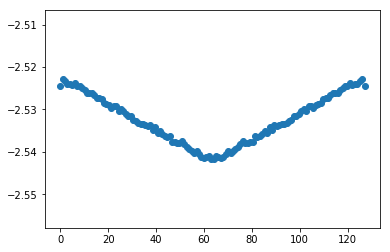

In [14]:
plt1 = plt.scatter(np.linspace(0,127,126), jointrows)

In [55]:
zsensor_pd2 = zsensor_pd1 = zsensor_pd1.multiply(-1)

## Attempt to replicate Elias matlab code.

In [106]:
zsensor.shape

(5000, 64, 64)

In [109]:
len(zsensor[1,1,:])

64

In [264]:
#This needs to be added to .py file!!
zsensor = np.multiply(zsensor, -1000000000)

In [8]:
len(zsensor) - len(zsensor)

0

In [7]:
len(zsensor[1,1,:])-1

63

In [265]:
#Find max z for every x,y position.  Populate matrix with values.
Zmax, indZ = np.zeros((64,64)), np.zeros((64,64))
for j in range(len(zsensor[1,:,1])):
    for i in range(len(zsensor[1,1,:])):
        Zmax[j,i] = np.min(zsensor[:,i,j])
        indZ[j,i] = np.min(np.where(zsensor[:,i,j] == np.min(zsensor[:,i,j])))

In [50]:
int(indZ[60,60])

2498

In [75]:
np.nonzero(zsensor[:,5,5] == min(zsensor[:,5,5]))

(array([2505, 2506, 2507, 2508, 2509, 2510]),)

In [71]:
where = np.where(zsensor[:,5,5] == max(zsensor[:,5,5]))
here = np.max(where)
print(here)

2510


In [ ]:
np.max(np.where(zsensor[:,5,5] == max(zsensor[:,5,5])))

In [11]:
Zmax_pd = pd.DataFrame(Zmax)
print(Zmax_pd.shape)
Zmax_pd.head()

(64, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
1,252.482579,252.450747,252.414367,252.397143,252.375969,252.303266,252.219650,252.218769,252.218882,252.194354,...,252.324384,252.323758,252.323730,252.320689,252.314436,252.317051,252.316568,252.265068,252.229512,252.233377
2,252.287151,252.278625,252.254040,252.269388,252.306222,252.339930,252.349622,252.363918,252.382307,252.381568,...,252.204387,252.218740,252.219166,252.217148,252.232041,252.248697,252.259554,252.267768,252.277459,252.284025
3,252.345473,252.325520,252.347348,252.382165,252.408682,252.440060,252.440003,252.434774,252.409677,252.392965,...,252.343654,252.343654,252.338822,252.366675,252.421700,252.434575,252.435399,252.412320,252.385632,252.374946
4,252.391118,252.419056,252.450064,252.457568,252.458904,252.459245,252.415958,252.328590,252.341948,252.378328,...,252.450860,252.426702,252.388958,252.362156,252.358802,252.408825,252.427185,252.427270,252.400127,252.349622


In [224]:
print(np.mean(Zmax[5,:]))

-2.47942023356984e-07


In [76]:
#Correct the sample tilt in the z-direction.
Zdrifty = np.zeros(64)
Zcorr = np.zeros((64,64))
for j in range(len(zsensor[1,:,1])):
    Zdrifty[j] = np.mean(Zmax[j,:])
    Zcorr[j,:] = Zmax[j,:] - Zdrifty[j]

In [77]:
#Correct the sample tilt in the x,y plane
Zdriftx = np.zeros(64)
for i in range(len(Zcorr)):
    Zdriftx[i] = np.mean(Zcorr[:,i])
    Zcorr[:,i] = Zcorr[:,i]-Zdriftx[i]

In [266]:
#This is just to compile the code from the previous two cells.
Zdrifty = np.zeros(64)
Zdriftx = np.zeros(64)
Zcorr = np.zeros((64,64))
for j in range(len(zsensor[1,:,1])):
    for i in range(len(Zcorr)):
        Zdrifty[j] = np.mean(Zmax[j,:])
        Zdriftx[i] = np.mean(Zcorr[:,i])
        Zcorr[j,:] = Zmax[j,:] - Zdrifty[j]
        Zcorr[:,i] = Zcorr[:,i]-Zdriftx[i]

In [228]:
print(Zcorr[1,1])
print(np.amax(Zcorr))

-7.660293233069382e-11
1.5719671397906865e-10


In [267]:
#flip Zdata, so the z-values so that the hegiht map matches the sample.
Zcorr = np.subtract(Zcorr, np.amin(Zcorr))

In [71]:
#Do this earlier with zsensor.
#Zcorr = np.multiply(Zcorr, -1000000000)

In [10]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


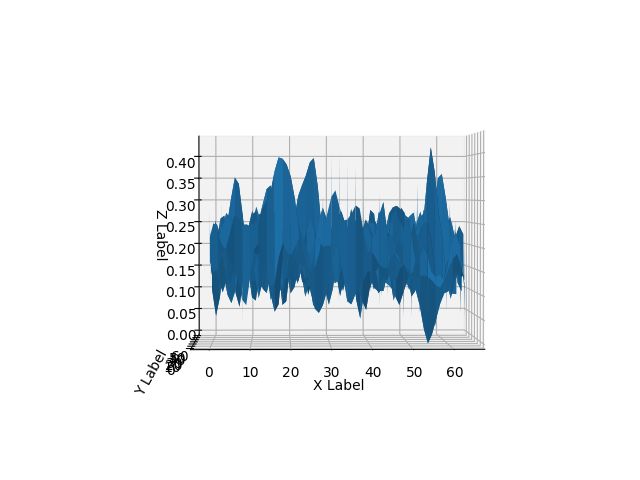

In [268]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.linspace(0, 63, 64)
X, Y = np.meshgrid(x, y)
Z = Zcorr

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [73]:
Zcorr[1,1]

0.2741724579276955

In [28]:
#zsensor = np.multiply(zsensor, -1000000000)
#Zdriftx = np.multiply(Zdriftx, -1000000000)
#Zdrifty = np.multiply(Zdrifty, -1000000000)

In [276]:

DIFF = np.zeros((64,64))
m = 0
ZSNSRtotCORR = np.zeros((5000,64,64))
for j in range(len(zsensor[1,:,1])):
    for i in range(len(zsensor[1,1,:])):
        ZSNSRtotCORR[:,i,j] = zsensor[:,i,j] - Zdriftx[i] - Zdrifty[j]
        #DIFF[i,j] = max(ZSNSRtotCORR[:,i,j]) - min(ZSNSRtotCORR[:,i,j])
        #m = m + 1

In [270]:
ZMEAN = np.zeros(5000)
for z in range(len(ZMEAN)):
    ZMEAN[z] = np.mean(ZSNSRtotCORR[z,:,:])

In [18]:
Ztest = np.empty_like(zsensor)
Ztest.shape

(5000, 64, 64)

<IPython.core.display.Javascript object>


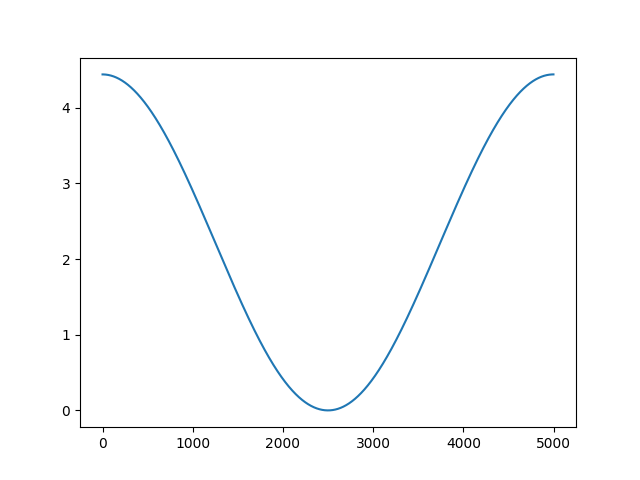

In [277]:
x = np.linspace(0,4999,5000)

Fig, ax = plt.subplots()

# This plots a gap---as desired
ax.plot(x, ZMEAN)


In [275]:
np.max(ZMEAN)

4.439240219275542

In [283]:
Zlinear = np.flip(np.arange(0,np.max(ZMEAN),(0.01)), axis = 0)

In [297]:
print(phase[:(int(indZ[0,0])),0,0])

[nan nan nan ... nan nan nan]


In [301]:
#A bit faster now!!
reduced_phase = np.zeros((444,64,64))
for j in range(len(zsensor[1,:,1])):
    for i in range(len(zsensor[1,1,:])):
        z = phase[:(int(indZ[i,j])),i,j]
        bin_means = (np.histogram(z, len(Zlinear), weights=z)[0] /
             np.histogram(z, len(Zlinear))[0])
        #bin_means_df = pd.DataFrame(bin_means)
        #interpolated = bin_means_df.interpolate(method = 'index')
        #interpolated = np.array(bin_means_df)
        reduced_phase[:,i,j] = bin_means.flatten()

/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [302]:
reduced_phase[0,0,0]

69.77874183654785

In [289]:
z = phase[:(int(indZ[3,3])),3,3]
bin_means = (np.histogram(z, len(Zlinear), weights=z)[0] /
             np.histogram(z, len(Zlinear))[0])

/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [290]:
print(bin_means)

[ 67.44181824          nan          nan          nan          nan
  68.014534            nan          nan          nan          nan
  68.58387756          nan          nan          nan  68.98389435
          nan          nan  69.34727478          nan          nan
  69.67485046  69.81433105  69.90016174          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
  71.37564087          nan          nan          nan          nan
  71.90213776          nan  72.16254044          nan  72.34751129
          nan          nan          nan          nan  72.86824799
  73.03559113  73.1580658           nan  73.34763336          nan
          nan          nan  73.78700256  73.88082123  73.99274063
          nan  74.21007538  74.30532837          nan          nan
  74.69013596  74.75632222          nan          nan          nan
          nan          nan          nan  75.53433228  75.60448456
          

In [210]:
z = phase[:(int(indZ[0,0])),0,0]
bin_means = (np.histogram(z, len(Zlinear), weights=z)[0] /
             np.histogram(z, len(Zlinear))[0])
bin_means_df = pd.DataFrame(bin_means)
interpolated = bin_means_df.interpolate(method = 'index')
interpolated = np.array(bin_means_df)
reduced_phase[:,0,0] = interpolated.flatten()

/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [211]:
print(bin_means_df)

      0
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
10  NaN
11  NaN
12  NaN
13  NaN
14  NaN
15  NaN
16  NaN
17  NaN
18  NaN
19  NaN
20  NaN
21  NaN
22  NaN
23  NaN
24  NaN
25  NaN
26  NaN
27  NaN
28  NaN
29  NaN
..   ..
407 NaN
408 NaN
409 NaN
410 NaN
411 NaN
412 NaN
413 NaN
414 NaN
415 NaN
416 NaN
417 NaN
418 NaN
419 NaN
420 NaN
421 NaN
422 NaN
423 NaN
424 NaN
425 NaN
426 NaN
427 NaN
428 NaN
429 NaN
430 NaN
431 NaN
432 NaN
433 NaN
434 NaN
435 NaN
436 NaN

[437 rows x 1 columns]


In [197]:
reduced_phase[0,0,0]

nan

In [103]:
bin_means = (np.histogram(array, len(Zlinear), weights=array)[0] /
             np.histogram(array, len(Zlinear))[0])

/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [120]:
bin_means.shape

(437, 1)

In [116]:
bin_means_df = pd.DataFrame(bin_means)
bin_means_df = bin_means_df.interpolate()
bin_means = np.array(bin_means_df)

In [119]:
bin_means.shape

(437, 1)

In [296]:
np.argwhere(phase == np.nan)

array([], shape=(0, 3), dtype=int64)

105.76905568440755

In [113]:
obejct.shape

(2532,)

In [31]:
ZSNSRtotCORR[indZ[5,5],5,5]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Ellen's ideas on Zsensor Code

In [51]:
print(ZSNSRtotCORR[5,:,:])

[[-1.54087715e-11 -4.60203541e-09 -4.44394231e-09 ... -4.40400803e-09
  -4.38128665e-09 -4.43075153e-09]
 [-1.13586779e-11 -4.56618142e-09 -4.43142255e-09 ... -4.42971547e-09
  -4.35353285e-09 -4.40223034e-09]
 [-9.07206255e-12 -4.52731606e-09 -4.40455115e-09 ... -4.43041313e-09
  -4.39561253e-09 -4.37805901e-09]
 ...
 [ 2.19892160e-12 -4.36691637e-09 -4.39896451e-09 ... -4.46888014e-09
  -4.44783564e-09 -4.46416080e-09]
 [-5.89514548e-13 -4.33338186e-09 -4.40965418e-09 ... -4.49557123e-09
  -4.44005120e-09 -4.43275792e-09]
 [-4.16887358e-12 -4.33841073e-09 -4.42306745e-09 ... -4.47629954e-09
  -4.43680935e-09 -4.40390811e-09]]


In [47]:
print(np.amax(ZSNSRtotCORR))
print(np.amin(ZSNSRtotCORR))

1.5719671397906865e-10
-4.721142796149103e-09


In [81]:
Zdriftx[30]

-6.452380666553265e-13

In [77]:
ZSNSRtotCORR = np.multiply(ZSNSRtotCORR, -1000000000)

In [78]:
np.where(ZSNSRtotCORR == np.min(ZSNSRtotCORR))

(array([2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505]),
 array([9, 9, 9, 9, 9, 9, 9, 9]),
 array([1, 1, 1, 1, 1, 1, 1, 1]))

In [79]:
print(ZSNSRtotCORR[2498,9,1])

-0.16532746889019906


In [21]:
def correct_slope(threeD_array):
    """Function that corrects for sample tilt

    Input: 3D numpy array of a single signal feed.  For instance, the entire dataset of
    zsensor data.  The function is flexible enough to work on any raw data signal, but can
    only work on one at a time.

    Output: 3D numpy array with values adjusted for sample tilt."""

    #Convert matrix from meters to nanometers.
    threeD_array = np.multiply(threeD_array, -1000000000)
    # We have create an numpy array of the correct shape to populate.
    array_min = np.zeros((len(threeD_array[1,:,1]),len(threeD_array[1,1,:])))
    indZ = np.zeros((len(threeD_array[1,:,1]),len(threeD_array[1,1,:])))
    #Populate zero arrays with min z values at all x,y positions.  Also, populate indZ array
    #with the index of the min z values for use in correct_Zsnsr()
    for j in range(len(threeD_array[1,:,1])):
        for i in range(len(threeD_array[1,1,:])):
            array_min[j,i] = np.max(threeD_array[:,i,j])
            indZ[j, i] = np.max(np.where(zsensor[:, i, j] == np.max(zsensor[:, i, j])))
    #Find the difference between the max and mean values in the z-direction for
    #each x,y point. Populate new matrix with corrected values.

    driftx = np.zeros(len(threeD_array[1,:,1]))
    drifty = np.zeros(len(threeD_array[1,1,:]))
    corrected_array = np.zeros((len(threeD_array[1,:,1]),len(threeD_array[1,1,:])))
    #Correct the for sample tilt along to the y-direction, then correct for sample tilt
    #along the x-direction.
    for j in range(len(threeD_array[1,:,1])):
        for i in range(len(threeD_array[1,1,:])):
            drifty[j] = np.mean(array_min[j, :])
            driftx[i] = np.mean(corrected_array[:, i])
            corrected_array[j, :] = array_min[j, :] - drifty[j]
            corrected_array[:, i] = corrected_array[:, i] - driftx[i]

    #Apply corrected slope to each level of 3D numpy array
    ZSNSRtotCORR = np.empty_like(threeD_array)
    for j in range(len(threeD_array[1, :, 1])):
        for i in range(len(threeD_array[1, 1, :])):
            ZSNSRtotCORR[:, i, j] = threeD_array[:, i, j] - driftx[i] - drifty[j]
    return corrected_array,ZSNSRtotCORR, indZ

In [22]:
Zcorr, ZSNSRtotCORR, indZ = correct_slope(zsensor)

In [175]:
zsensor[9,9,0]

-0.0

In [189]:
np.argwhere(phase == 0)

array([[   0,    0,    0],
       [   0,    1,    0],
       [   0,    2,    0],
       ...,
       [4999,   61,    0],
       [4999,   62,    0],
       [4999,   63,    0]])

In [166]:
a[0]

0.0

In [11]:
test = np.array([[1,2,3],[1,2,3]])
print(test)

[[1 2 3]
 [1 2 3]]


In [18]:
def test_correct_slope():
    test = np.array([[1,2,3],[1,2,3]])
    try:
        correct_slope(zsensor)
    except(Exception):
        pass
    else:
        raise Exception("Input numpy array not three dimensional.")
    assert test.ndim == 3,

In [19]:
test_correct_slope()

Exception: Input numpy array not three dimensional.

In [15]:
def test_load_data():
    data, z, z_approach, z_retract = load_data.load_data("PHASEdata.csv")
    try:
        load_data.load_data(123)
    except(Exception):
        pass
    else:
        raise Exception("Input error. String expected")
    assert data.shape == (1000,2305), 'data error'
    assert len(z) == 1000, 'z error'
    assert len(z_approach) == 500, 'z_appraoch error'
    assert len(z_retract) == 500, 'z_retract error'
    return

In [17]:
test_load_data()

NameError: name 'load_data' is not defined

In [28]:
indZ[5,5]

252.39472734028823